# *EDA To Prediction (DieTanic)

> ### *Sometimes life has a cruel sense of humor, giving you the thing you always wanted at the worst time possible.* -Lisa Kleypas

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. That's why the name **DieTanic**. This is a very unforgetable disaster that no one in the world can forget.

It took about $7.5 million to build the Titanic and it sunk under ther ocean due to collision. The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate in competitions in Kaggle.

The Objective of this notebook is to give an **idea how is the workflow in any predictive modeling problem**. How do we check features, how do we add new features and some Machine Learning Concepts. I have tried to keep the notebook as basic as possible so that even newbies can understand every phase of it.

If You Like the note book and think that it helped you..**PLEASE UPVOTE**. It will keep me motivated.

***
#### *Exploratory Data Analysis(탐색적 데이터 분석) *

# *EDA To Prediction (DieTanic)

> ### *때때로 인생은 가장 어려운 시기에 우리가 항상 원했던 것을 주는 잔인한 유머감각을 가진다.* -Lisa Kleypas

타이타닉 침몰은 역사상 가장 악명 높은 난파선 중 하나입니다. 1912 년 4 월 15 일, 첫 여행 중에 타이타닉은 빙산과 충돌하여 침몰하여 2224 명의 승객과 승무원 중 1502 명이 사망했습니다. 그것이 다이타닉이라는 이름의 이유입니다. 이것은 세상 어느 누구도 잊을 수없는 잊을 수없는 재앙입니다.

타이타닉을 만드는 데 약 750 만 달러가 들었으며 충돌로 인해 바다에서 침몰했습니다. 타이타닉 데이터 셋은 초보자가 데이터 분석 여행을 시작하고 캐글 경쟁에 참여할 수있는 매우 훌륭한 데이터 셋입니다.

이 문서의 목표는 ** 예측 모델링 문제에서 워크 플로가 어떻게 진행되는지 ** 아이디어를 제공하는 것입니다. 기능을 확인하는 방법, 새로운 기능 및 기계 학습 개념을 추가하는 방법 초보자도 문서의 모든 단계를 이해할 수 있도록 문서를 최대한 기본으로 유지하려고 노력했습니다.


***
#### *Exploratory Data Analysis(탐색적 데이터 분석) *

## Contents of the Notebook:

**Part1: Exploratory Data Analysis(EDA):**  
1)Analysis of the features.  
2)Finding any relations or trends considering nultiple features.  

**Part2: Feature Engineering and Data Cleaning:**  
1)Adding any few features.  
2)Removing redundant features.  
3)Converting features into suitable form for modeling.  

**Part3: Predictive Modeling**  
1)Running Basic Algorithms.  
2)Cross Validation.  
3)Ensembling.  
4)Important Features Extraction.

## Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv('input/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The **Age, Cabin and Embarked** have null value. I will try to fix them.

#### How many Survived??

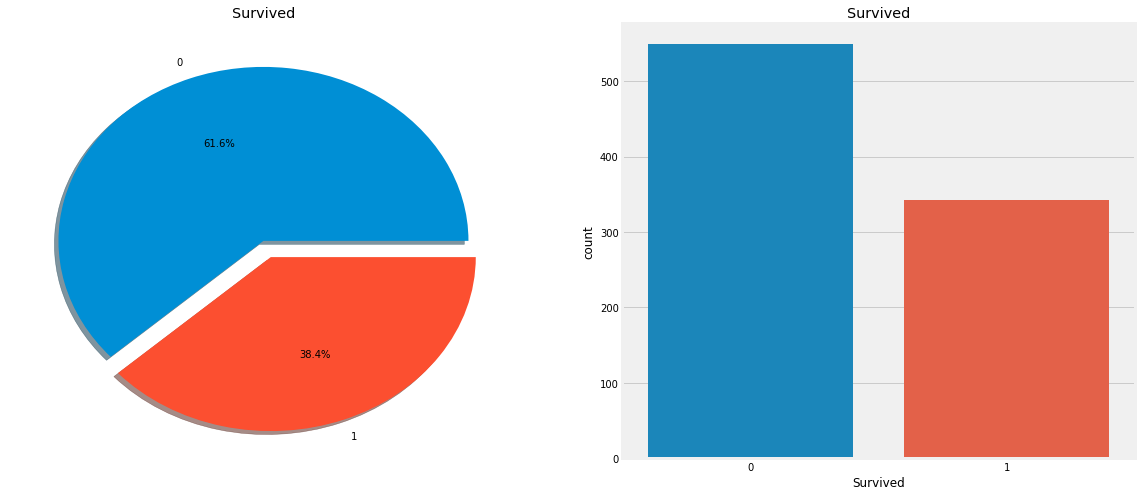

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = data, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not many passengers survived the accident.  

Out of 891 passengers in traning set, only around 350 survived i.e Only 38.4% of the total training set survived the crash.  We need to dig down more to get better insights from the data and see which categories of the passengers did servive and who didn't.  

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Part Of Embarcation, Age,etc.

First let us understand the different types of features.

사고로 살아남은 승객은 많지 않은 것이 분명하다.

트레이닝 세트에 있는 891명의 승객 중 약 350명만이 생존했다. 즉 전체 훈련 세트의 38.4% 만이 충돌에서 살아남았다. 우리는 승객의 어떤 부류가 살아남고 살아남지 못했는지 알 수 있는 데이터로부터 더 나은 이해를 위해 더 많은 것을 파헤쳐야 한다.

데이터 세트의 서로 다른 특성들에 따른 생존율을 확인하자. 특성은 성별, 부의 일부, 나이 등을 말한다.

먼저 이러한 다양한 유형의 특성들에 대해 이해해야 한다.

## Types Of Features

### Categorical Features:  
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables**.  

**Categorical Features in the dataset: Sex, Embarked.**

### Ordinal Feature:  
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like **Height** with values **Tall, Medium, Short,** then Height is a ordinal variable. Here we can have a relative sort in the variable.

**Ordinal Features in the dataset: PClass**

### Continous Feature:  
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.  

**Continous Features in the dataset: Age**

## 특성의 종류
### 범주형 특성 :
범주형 변수는 두 개 이상의 범주를 가진 변수로서, 해당 특성의 각 값은 범주별로 분류할 수 있다. 예를 들어 성별은 두 개의 범주(남성과 여성)를 갖는 범주형 변수다. 이제 우리는 그러한 변수들에 대해 정렬을 할 수도 다른 어떤 주문도 할 수 없다. 그들은 **명목 변수**라고도 한다.

**데이터 세트의 범주형 특성 : 성별, 착수.**

### 순서형 특성 :
순서형 변수는 범주형과 비슷하지만 그 차이점은 값 사이의 상대적 순서를 갖거나 또는 정렬이 가능하다는 것입니다. 예를 들어, **긴, 중간, 짧음** 값을 가진 **Height**와 같은 특성이 있으면 Height는 순서형 변수다. 여기서 변수에서 상대적인 정렬을 할 수 있다.

**데이터 세트의 순서형 특성 : PClass**

### 연속적 특성 :
특성의 열 중 최소값과 최대값 사잇값 혹은 어느 두 지점 사잇값을 가질 수 있으면 연속적 특성이라고 한다.

**데이터 세트의 연속적 특성 : 나이**